<a href="https://colab.research.google.com/github/Vedavarshini2006/AIML-experiments/blob/main/Queens_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up the game board as a list
board = ["-", "-", "-",
         "-", "-", "-",
         "-", "-", "-"]

# Define a function to print the game board
def print_board():
    print(board[0] + " | " + board[1] + " | " + board[2])
    print(board[3] + " | " + board[4] + " | " + board[5])
    print(board[6] + " | " + board[7] + " | " + board[8])

# Define a function to handle a player's turn
def take_turn(player):
    print(player + "'s turn.")
    position = input("Choose a position from 1-9: ")
    while position not in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        position = input("Invalid input. Choose a position from 1-9: ")
    position = int(position) - 1
    while board[position] != "-":
        position = int(input("Position already taken. Choose a different position: ")) - 1
    board[position] = player
    print_board()

# Define a function to check if the game is over
def check_game_over():
    # Check for a win
    if (board[0] == board[1] == board[2] != "-") or \
       (board[3] == board[4] == board[5] != "-") or \
       (board[6] == board[7] == board[8] != "-") or \
       (board[0] == board[3] == board[6] != "-") or \
       (board[1] == board[4] == board[7] != "-") or \
       (board[2] == board[5] == board[8] != "-") or \
       (board[0] == board[4] == board[8] != "-") or \
       (board[2] == board[4] == board[6] != "-"):
        return "win"
    # Check for a tie
    elif "-" not in board:
        return "tie"
    # Game is not over
    else:
        return "play"

# Define the main game loop
def play_game():
    print_board()
    current_player = "X"
    game_over = False
    while not game_over:
        take_turn(current_player)
        game_result = check_game_over()
        if game_result == "win":
            print(current_player + " wins!")
            game_over = True
        elif game_result == "tie":
            print("It's a tie!")
            game_over = True
        else:
            # Switch to the other player
            current_player = "O" if current_player == "X" else "X"

# Start the game
play_game()


- | - | -
- | - | -
- | - | -
X's turn.
Choose a position from 1-9: 2
- | X | -
- | - | -
- | - | -
O's turn.
Choose a position from 1-9: 1
O | X | -
- | - | -
- | - | -
X's turn.
Choose a position from 1-9: 5
O | X | -
- | X | -
- | - | -
O's turn.
Choose a position from 1-9: 9
O | X | -
- | X | -
- | - | O
X's turn.
Choose a position from 1-9: 8
O | X | -
- | X | -
- | X | O
X wins!


In [ ]:
def is_safe(board, row, col, N):
    # Check the same column
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    for i, j in zip(range(row - 1, -1, -1), range(col - 1, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check upper right diagonal
    for i, j in zip(range(row - 1, -1, -1), range(col + 1, N)):
        if board[i][j] == 1:
            return False

    return True

def solve_nqueens_util(board, row, N):
    if row == N:
        # All queens are placed successfully
        for i in range(N):
            for j in range(N):
                print(board[i][j], end=" ")
            print()
        print()
        return True  # Indicate a solution found

    for col in range(N):
        if is_safe(board, row, col, N):
            # Place queen
            board[row][col] = 1

            # Recur for the next row
            if solve_nqueens_util(board, row + 1, N):
                return True  # Solution found in a deeper recursion

            # If placing queen in the current position doesn't lead to a solution, backtrack
            board[row][col] = 0

    return False  # No solution found in this path

def solve_nqueens(N):
    board = [[0 for _ in range(N)] for _ in range(N)]
    if not solve_nqueens_util(board, 0, N):
        print("Solution does not exist")

# Example usage for 8 queens:
solve_nqueens(8)

1 0 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 0 0 0 0 1 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 



In [ ]:
def print_board(board):
    """Prints the current state of the board."""
    for row in board:
        print(" ".join(row))

def is_safe(board, row, col, N):
    """Checks if it's safe to place a queen at (row, col)."""
    # Check row and column
    for i in range(N):
        if board[row][i] == "Q" or board[i][col] == "Q":
            return False

    # Check diagonals
    for i in range(N):
        for j in range(N):
            if board[i][j] == "Q" and abs(row - i) == abs(col - j):
                return False

    return True

def solve_n_queens_util(board, col, N):
    """Recursive helper function to solve the N-Queens problem."""
    if col == N:
        return True  # All queens placed successfully

    for row in range(N):
        if is_safe(board, row, col, N):
            board[row][col] = "Q"  # Place queen
            if solve_n_queens_util(board, col + 1, N):
                return True  # Solution found
            board[row][col] = "."  # Backtrack if no solution found

    return False  # No solution found for this column

def solve_n_queens(N):
    """Solves the N-Queens problem and prints the solution."""
    board = [["." for _ in range(N)] for _ in range(N)]

    if not solve_n_queens_util(board, 0, N):
        print("Solution does not exist")
        return

    print_board(board)

def play_n_queens(N):
    """Allows the user to play the N-Queens game."""
    board = [["." for _ in range(N)] for _ in range(N)]
    queens_placed = 0

    while queens_placed < N:
        print_board(board)
        row = int(input("Enter row (0-" + str(N - 1) + "): "))
        col = int(input("Enter column (0-" + str(N - 1) + "): "))

        if 0 <= row < N and 0 <= col < N and board[row][col] == "." and is_safe(board, row, col, N):
            board[row][col] = "Q"
            queens_placed += 1
        else:
            print("Invalid move. Try again.")

    print("Congratulations! You solved the N-Queens problem.")

# Get the value of N from the user
N = int(input("Enter the value of N: "))

# Start the game
play_n_queens(N)


Enter the value of N: 5
. . . . .
. . . . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 0
Enter column (0-4): 0
Q . . . .
. . . . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 3
Enter column (0-4): 3
Invalid move. Try again.
Q . . . .
. . . . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 1
Enter column (0-4): 2
Q . . . .
. . Q . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 1
Enter column (0-4): 4
Invalid move. Try again.
Q . . . .
. . Q . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 0
Enter column (0-4): 3
Invalid move. Try again.
Q . . . .
. . Q . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 1
Enter column (0-4): 3
Invalid move. Try again.
Q . . . .
. . Q . .
. . . . .
. . . . .
. . . . .
Enter row (0-4): 3
Enter column (0-4): 1
Q . . . .
. . Q . .
. . . . .
. Q . . .
. . . . .
Enter row (0-4): 4
Enter column (0-4): 3
Q . . . .
. . Q . .
. . . . .
. Q . . .
. . . Q .
Enter row (0-4): 2
Enter column (0-4): 3
Invalid move. Try again.
Q . . . .
. . Q . .
. . . . .
. 

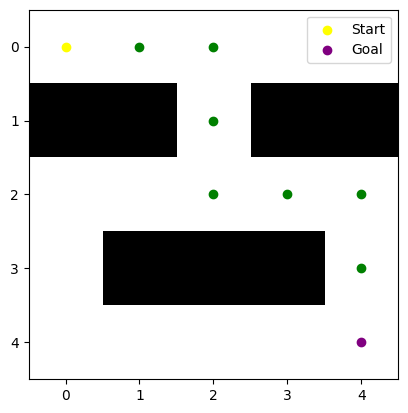

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import deque

def bfs(maze, start, goal):
    queue = deque([(start, [])])
    visited = set()

    while queue:
        current, path = queue.popleft()
        x, y = current

        if current == goal:
            return path + [current]

        if current in visited:
            continue

        visited.add(current)

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                queue.append(((nx, ny), path + [current]))

    return None

def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.Normalize(bounds[0], bounds[-1])

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    ax.scatter(start[1], start[0], color='yellow', marker='o', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', marker='o', label='Goal')

    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='green', marker='o')

    ax.legend()
    plt.show()

# Example maze
maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = bfs(maze, start, goal)

visualize_maze(maze, start, goal, path)
